#14. Создаем анимацию графиков Классы FuncAnimation и ArtistAnimation | Matplotlib уроки

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np 
from PIL import Image
from IPython.display import clear_output, display
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, ArtistAnimation
from IPython.display import HTML

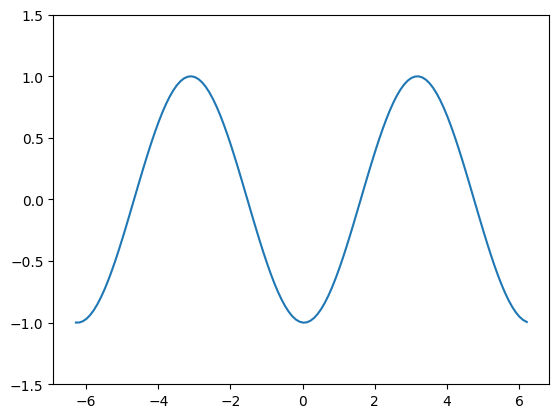

In [28]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.cos(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y)
ax.set_ylim(-1.5, 1.5)  

for delay in np.arange(0, np.pi, 0.1):
    y = np.cos(x + delay)
    line.set_ydata(y)

    clear_output(wait=True)
    display(fig)
    time.sleep(0.1)

plt.close() 

In [29]:


def update_cos(frame, line, x):
    y = np.cos(x + frame)
    line.set_data(x, y)
    return [line]

# Подготовка данных
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.cos(x)

# Создаём фигуру и оси
fig, ax = plt.subplots()
line, = ax.plot(x, y)

# Настраиваем масштаб осей
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(-1.5, 1.5)

# Фреймы (фаза)
phasa = np.arange(0, 4*np.pi, 0.1)

# Анимация
animation = FuncAnimation(
    fig, 
    func=update_cos,
    frames=phasa,
    fargs=(line, x),
    interval=30,
    blit=True,
    repeat=True
)

# Отображаем в Jupyter
HTML(animation.to_jshtml())


In [30]:

# Создаём фигуру и ось
fig, ax = plt.subplots()

# Подготовим данные
x = np.linspace(-2*np.pi, 2*np.pi, 200)
phases = np.linspace(0, 4*np.pi, 60)

# Установим границы осей
ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1.5, 1.5)

# Сюда будем складывать кадры
frames = []

# Генерация кадров
for phase in phases:
    y = np.cos(x + phase)
    line, = ax.plot(x, y, color='blue')
    frames.append([line])  # важно — список списков!

# Создаём анимацию
ani = ArtistAnimation(
    fig,
    artists=frames,   # список кадров
    interval=50,      # миллисекунды между кадрами
    repeat=True
)

# Отображение в Jupyter
HTML(ani.to_jshtml())